## ENGIROT ANDREW RONNIE
# ACCESS NO B23187

In [12]:
#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

## Section 1 (20 marks)

QUESTION 1

In [34]:
# Load the dataset from a CSV file
data = pd.read_excel('Superstore_Sales.xls')

In [35]:
# Display the first few rows of the dataset
print(data.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

Geting an initial understanding of the dataset by checking its structure and the first few rows.

In [36]:
# Get basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Descriptive Statistics

Generate statistical summaries of numerical columns to understand their distribution and characteristics.

In [37]:
# Generate descriptive statistics for numerical columns
print(data.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

Check for Missing Values

Identify if there are any missing values in the dataset.

In [38]:
# Check for missing values in each column
print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Checking for Outliers

Use visual tools like boxplots to detect outliers—values that significantly differ from other data points.

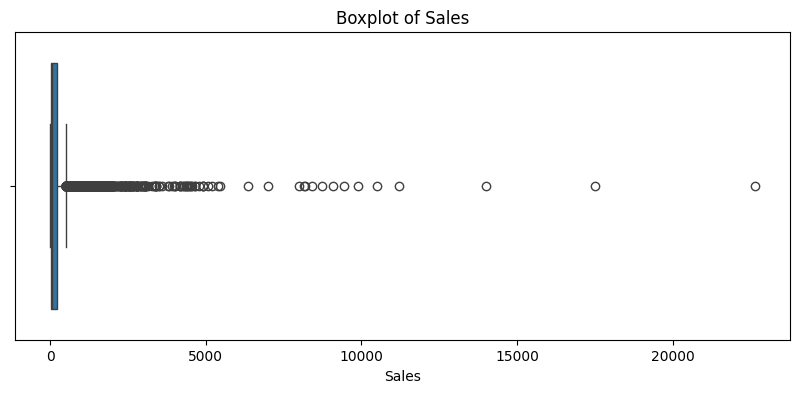

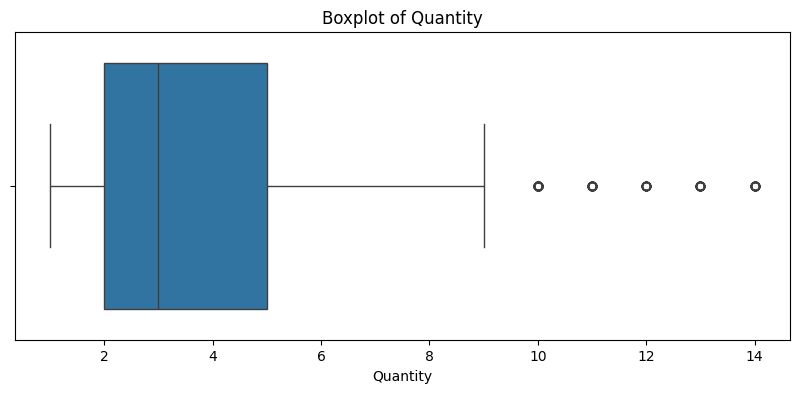

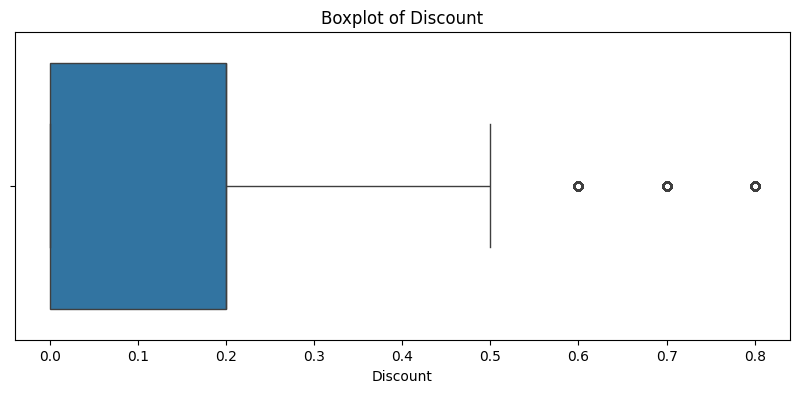

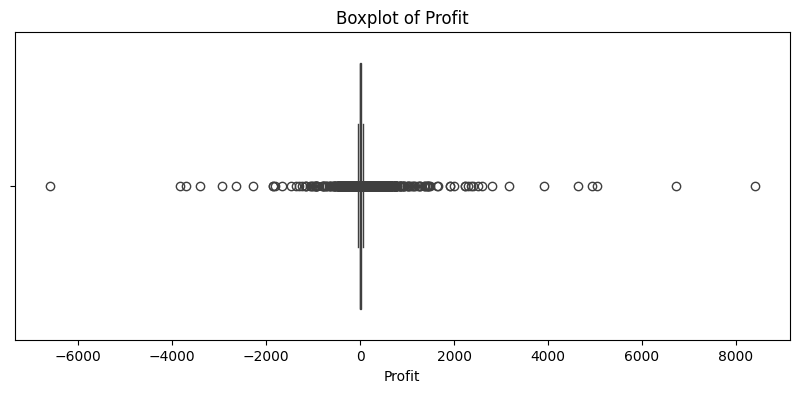

In [39]:


# Create boxplots to visualize outliers for each numerical column
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

some otliers indentified 

Handling Missing Values

Decide how to manage missing data based on its impact on the analysis

In [40]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# we can Alternatively, fill missing values with a specific value, e.g., the mean
# data['Sales'].fillna(data['Sales'].mean(), inplace=True)

Handling Anomalies and Outliers

Address outliers using statistical methods to improve data quality.

In [41]:
# Remove outliers using IQR for the 'Sales' column
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data.query('(@Q1 - 1.5 * @IQR) <= Sales <= (@Q3 + 1.5 * @IQR)')

Save the Cleaned Dataset

After cleaning the data, save it to a new file to preserve the changes.

In [42]:
# Save the cleaned dataset to a new CSV file
filtered_data.to_csv('Cleaned_Engirot1.csv', index=False)

Visualize Trends and Seasonal Patterns

Plot sales data over time to observe trends and patterns.

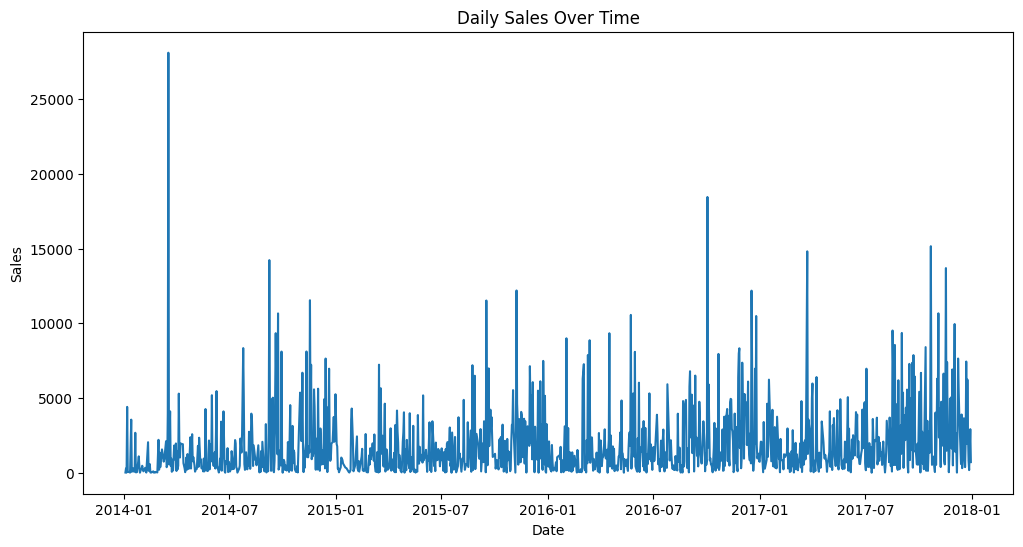

In [43]:
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%y')

# Group by date and sum sales
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


question1

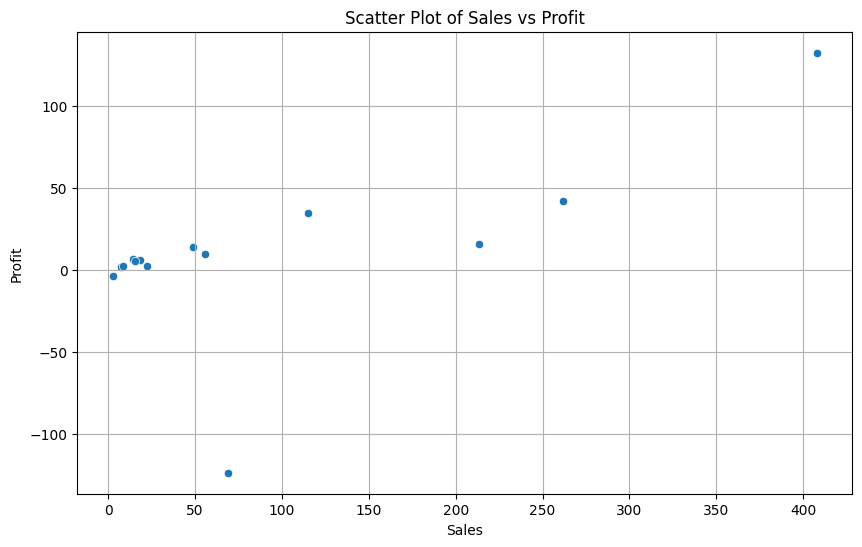

Pearson Correlation Coefficient: 0.64
Correlation Matrix:
           Sales    Profit
Sales   1.000000  0.638512
Profit  0.638512  1.000000


In [45]:

# Sample data
data = {
    'Sales': [261.96, 14.62, 22.368, 48.86, 7.28, 18.504, 114.9, 15.552, 407.976, 68.81, 2.544, 55.5, 8.56, 213.48],
    'Profit': [41.9136, 6.8714, 2.5164, 14.1694, 1.9656, 5.7825, 34.47, 5.4432, 132.5922, -123.858, -3.816, 9.99, 2.4824, 16.011]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Scatter Plot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Calculate the Pearson Correlation Coefficient
correlation = df['Sales'].corr(df['Profit'])
print(f'Pearson Correlation Coefficient: {correlation:.2f}')

# Optional: Calculate the correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Positive Correlation:

 If points tend to rise together, it suggests a positive correlation, meaning as Sales increase, Profit also tends to increase.

Negative Correlation: 

If points show an inverse pattern, it suggests a negative correlation, meaning as Sales increase, Profit tends to decrease.


question2

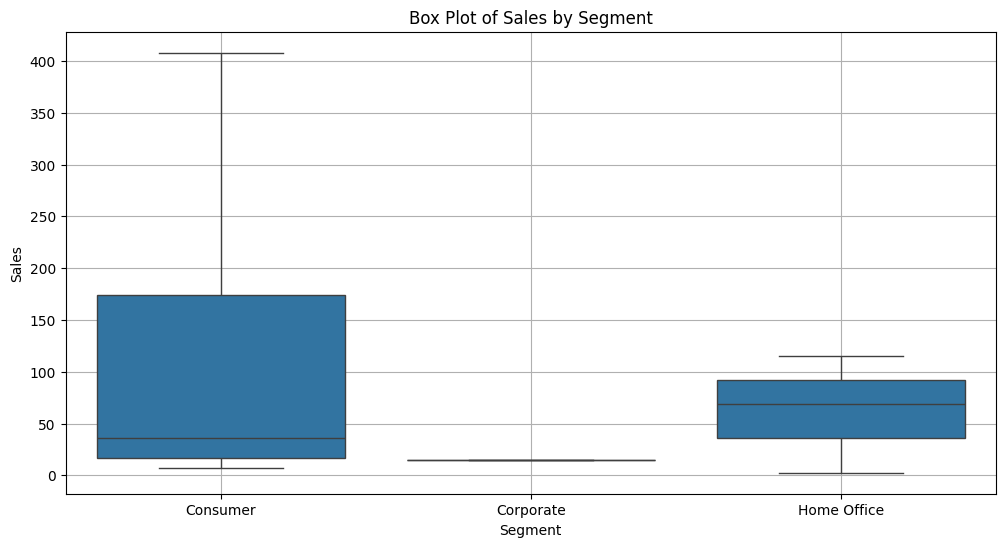

In [48]:

import scipy.stats as stats
# Sample data
data = {
    'Sales': [261.96, 14.62, 22.368, 48.86, 7.28, 18.504, 114.9, 15.552, 407.976, 68.81, 2.544, 55.5, 8.56, 213.48],
    'Segment': ['Consumer', 'Corporate', 'Consumer', 'Consumer', 'Consumer', 'Consumer', 'Home Office', 'Consumer', 'Consumer', 'Home Office', 'Home Office', 'Consumer', 'Consumer', 'Consumer']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Segment', y='Sales')
plt.title('Box Plot of Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

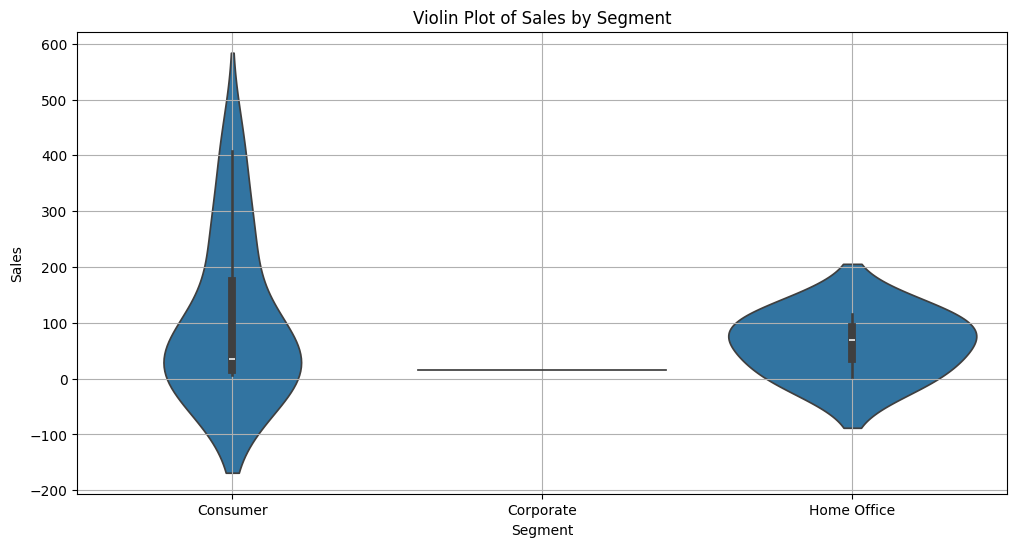

In [49]:

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Segment', y='Sales')
plt.title('Violin Plot of Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [50]:

# ANOVA
groups = df.groupby('Segment')['Sales'].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)

print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

ANOVA F-statistic: 0.32
ANOVA p-value: 0.7320


In [51]:

# Interpretation of p-value
alpha = 0.05
if p_value < alpha:
    print("The differences between segments are statistically significant.")
else:
    print("There are no statistically significant differences between segments.")


There are no statistically significant differences between segments.


question 3

In [52]:
from scipy.stats import chi2_contingency

# Sample data
data = {
    'Segment': ['Consumer', 'Corporate', 'Consumer', 'Consumer', 'Consumer', 'Consumer', 'Home Office', 'Consumer', 'Consumer', 'Home Office', 'Home Office', 'Consumer', 'Consumer', 'Consumer'],
    'Region': ['South', 'West', 'South', 'South', 'West', 'North', 'Central', 'South', 'West', 'Central', 'Central', 'South', 'West', 'West']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Contingency Table
contingency_table = pd.crosstab(df['Segment'], df['Region'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Region       Central  North  South  West
Segment                                 
Consumer           0      1      5     4
Corporate          0      0      0     1
Home Office        3      0      0     0


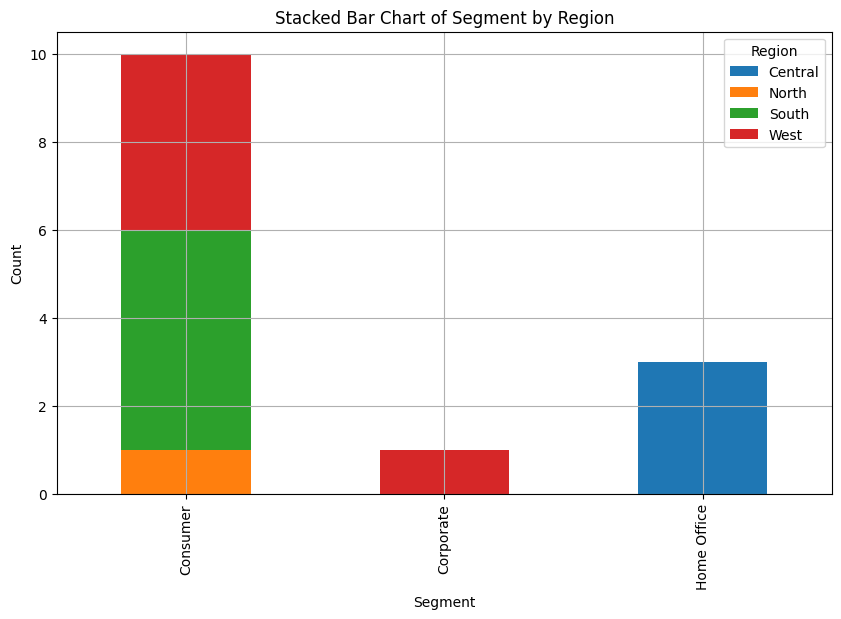

In [53]:
# Stacked Bar Chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Segment by Region')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.legend(title='Region')
plt.grid(True)
plt.show()


In [54]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Interpretation of p-value
alpha = 0.05
if p < alpha:
    print("The association between Segment and Region is statistically significant.")
else:
    print("There is no statistically significant association between Segment and Region.")


Chi-Square Statistic: 15.68
P-Value: 0.0156
Degrees of Freedom: 6
Expected Frequencies:
[[2.14285714 0.71428571 3.57142857 3.57142857]
 [0.21428571 0.07142857 0.35714286 0.35714286]
 [0.64285714 0.21428571 1.07142857 1.07142857]]
The association between Segment and Region is statistically significant.


question 4

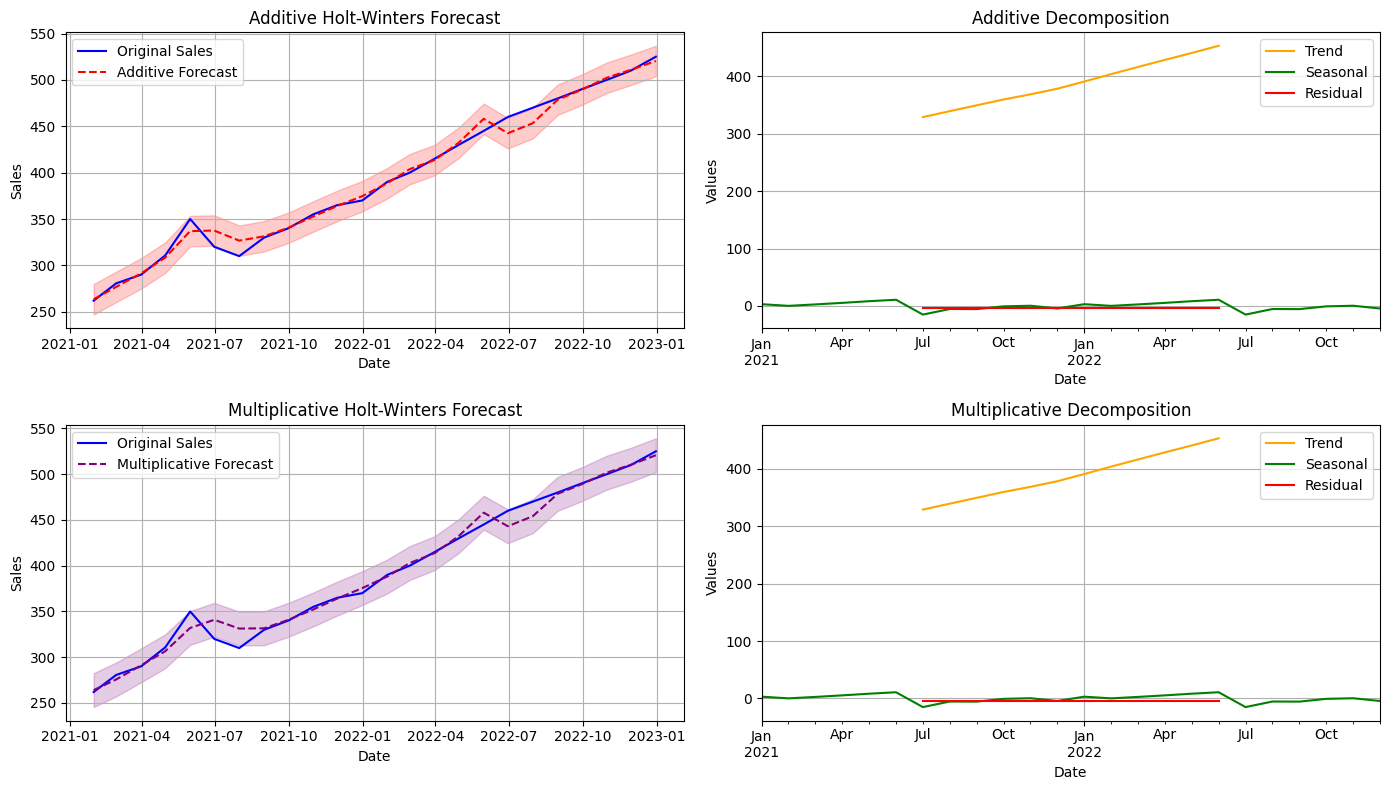

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample Data
data = {
    'Order Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),
    'Sales': [261.96, 280.62, 290.00, 310.75, 350.00, 320.00, 310.00, 330.00, 340.00, 355.00, 365.00, 370.00,
              390.00, 400.00, 415.00, 430.00, 445.00, 460.00, 470.00, 480.00, 490.00, 500.00, 510.00, 525.00]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Order Date', inplace=True)

# Holt-Winters Additive Model
model_add = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['forecast_add'] = model_add.predict(start=df.index[0], end=df.index[-1])

# Holt-Winters Multiplicative Model
model_mult = ExponentialSmoothing(df['Sales'], trend='add', seasonal='mul', seasonal_periods=12).fit()
df['forecast_mult'] = model_mult.predict(start=df.index[0], end=df.index[-1])

# Decomposition
decomposition_add = seasonal_decompose(df['Sales'], model='add', period=12)
decomposition_mult = seasonal_decompose(df['Sales'], model='add', period=12)
# Plotting
plt.figure(figsize=(14, 8))

# Original Sales and Additive Forecast
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Sales'], label='Original Sales', color='blue')
plt.plot(df.index, df['forecast_add'], label='Additive Forecast', color='red', linestyle='--')
plt.fill_between(df.index, df['forecast_add'] - 1.96*model_add.resid.std(), 
                 df['forecast_add'] + 1.96*model_add.resid.std(), color='red', alpha=0.2)
plt.title('Additive Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)


# Additive Decomposition
plt.subplot(2, 2, 2)
decomposition_add.trend.plot(label='Trend', color='orange')
decomposition_add.seasonal.plot(label='Seasonal', color='green')
decomposition_add.resid.plot(label='Residual', color='red')
plt.title('Additive Decomposition')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Original Sales and Multiplicative Forecast
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Sales'], label='Original Sales', color='blue')
plt.plot(df.index, df['forecast_mult'], label='Multiplicative Forecast', color='purple', linestyle='--')
plt.fill_between(df.index, df['forecast_mult'] - 1.96*model_mult.resid.std(), 
                 df['forecast_mult'] + 1.96*model_mult.resid.std(), color='purple', alpha=0.2)
plt.title('Multiplicative Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)


# Multiplicative Decomposition
plt.subplot(2, 2, 4)
decomposition_mult.trend.plot(label='Trend', color='orange')
decomposition_mult.seasonal.plot(label='Seasonal', color='green')
decomposition_mult.resid.plot(label='Residual', color='red')
plt.title('Multiplicative Decomposition')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


The plot provides a comprehensive view of how the time series data is decomposed into its fundamental components

question 5

Additive Model - MAE: 5.49, MSE: 67.43, RMSE: 8.21
Multiplicative Model - MAE: 6.12, MSE: 85.57, RMSE: 9.25


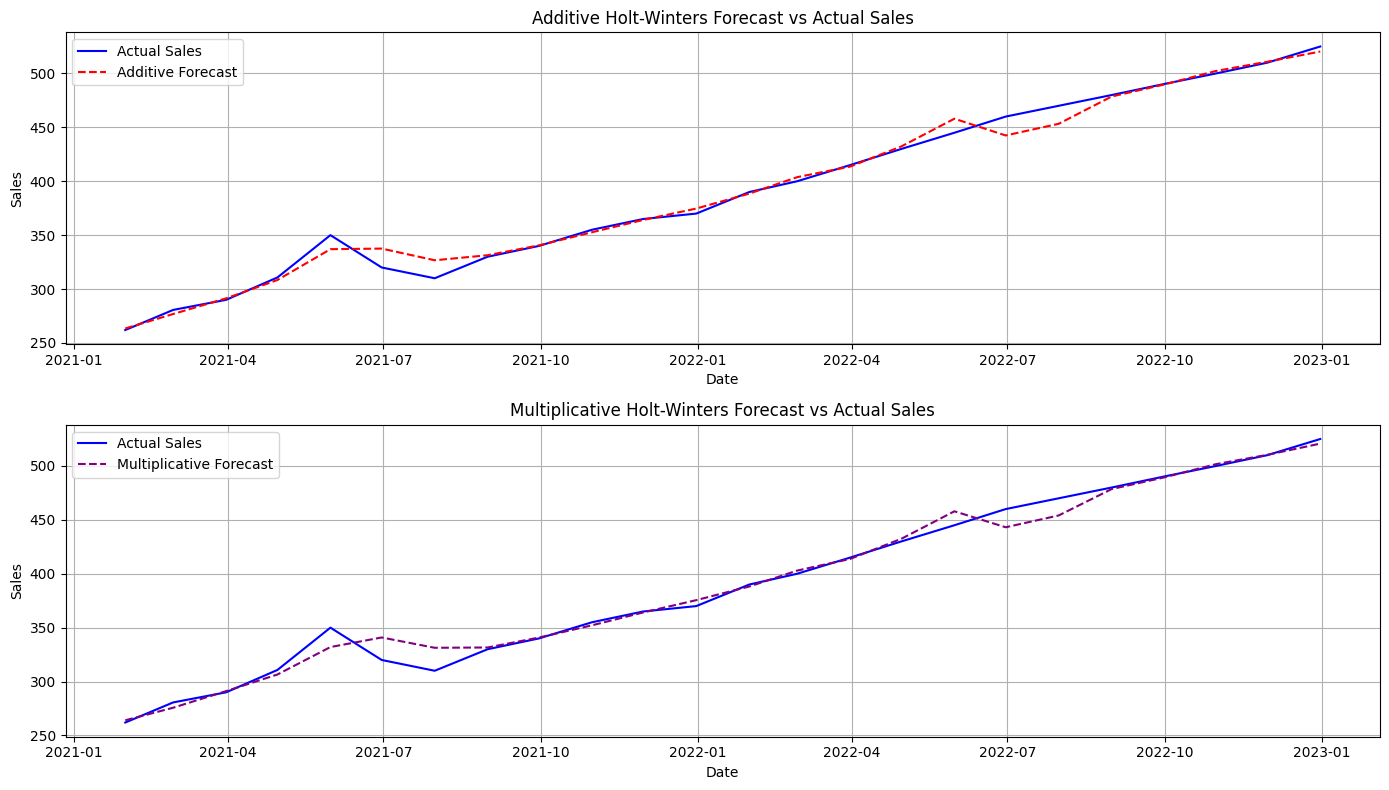

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np

# Sample Data
data = {
    'Order Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),
    'Sales': [261.96, 280.62, 290.00, 310.75, 350.00, 320.00, 310.00, 330.00, 340.00, 355.00, 365.00, 370.00,
              390.00, 400.00, 415.00, 430.00, 445.00, 460.00, 470.00, 480.00, 490.00, 500.00, 510.00, 525.00]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Order Date', inplace=True)

# Holt-Winters Additive Model
model_add = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['forecast_add'] = model_add.predict(start=df.index[0], end=df.index[-1])

# Holt-Winters Multiplicative Model
model_mult = ExponentialSmoothing(df['Sales'], trend='add', seasonal='mul', seasonal_periods=12).fit()
df['forecast_mult'] = model_mult.predict(start=df.index[0], end=df.index[-1])

# Calculate Errors
def calculate_errors(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_add, mse_add, rmse_add = calculate_errors(df['Sales'], df['forecast_add'])
mae_mult, mse_mult, rmse_mult = calculate_errors(df['Sales'], df['forecast_mult'])

print(f'Additive Model - MAE: {mae_add:.2f}, MSE: {mse_add:.2f}, RMSE: {rmse_add:.2f}')
print(f'Multiplicative Model - MAE: {mae_mult:.2f}, MSE: {mse_mult:.2f}, RMSE: {rmse_mult:.2f}')

# Plotting
plt.figure(figsize=(14, 8))

# Additive Model Forecast vs Actual
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
plt.plot(df.index, df['forecast_add'], label='Additive Forecast', color='red', linestyle='--')
plt.title('Additive Holt-Winters Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Multiplicative Model Forecast vs Actual
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
plt.plot(df.index, df['forecast_mult'], label='Multiplicative Forecast', color='purple', linestyle='--')
plt.title('Multiplicative Holt-Winters Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Section 2 (20 marks)

question 1

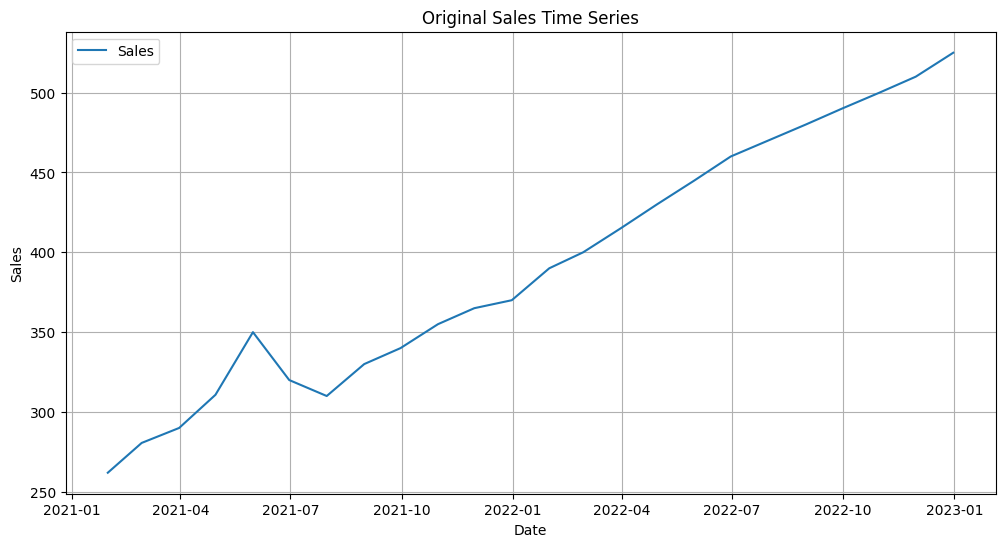

ADF Statistic: 0.25295229168432215
p-value: 0.9750799583775814
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}


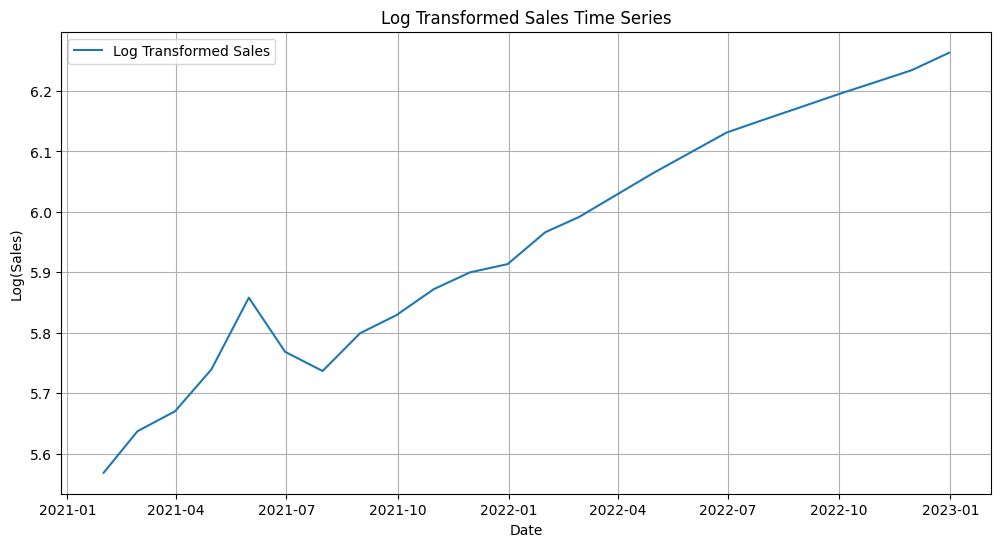

Log Transformed ADF Statistic: -0.24634569524818525
p-value: 0.9327671208882904
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}


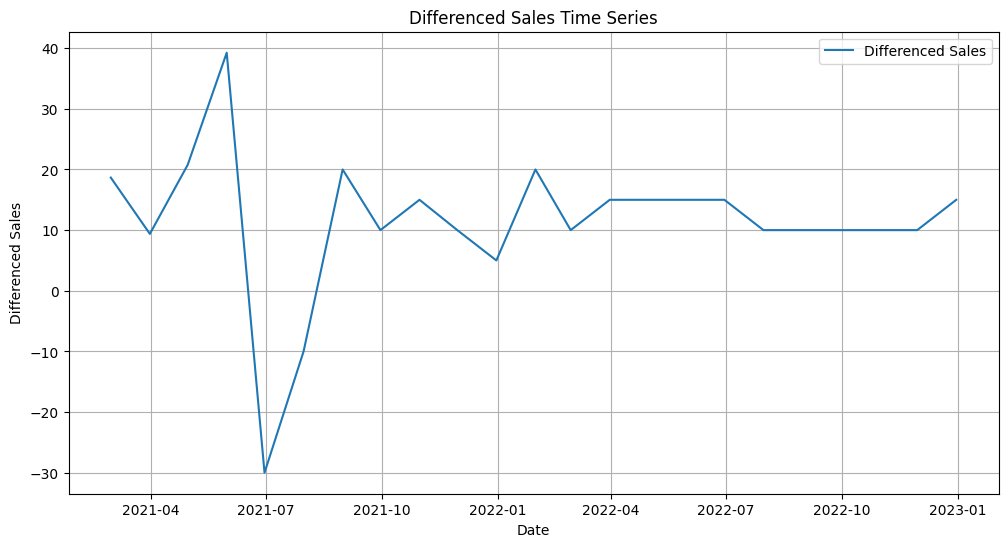

Differenced ADF Statistic: -2.0224538337971154
p-value: 0.27681547546009067
Critical Values: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}


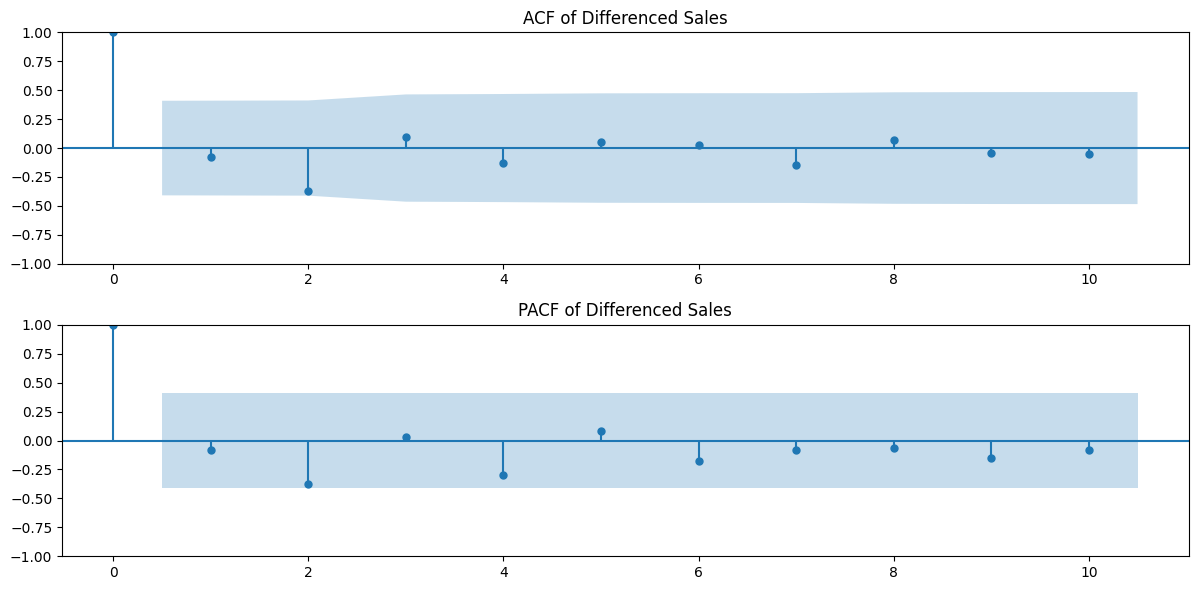

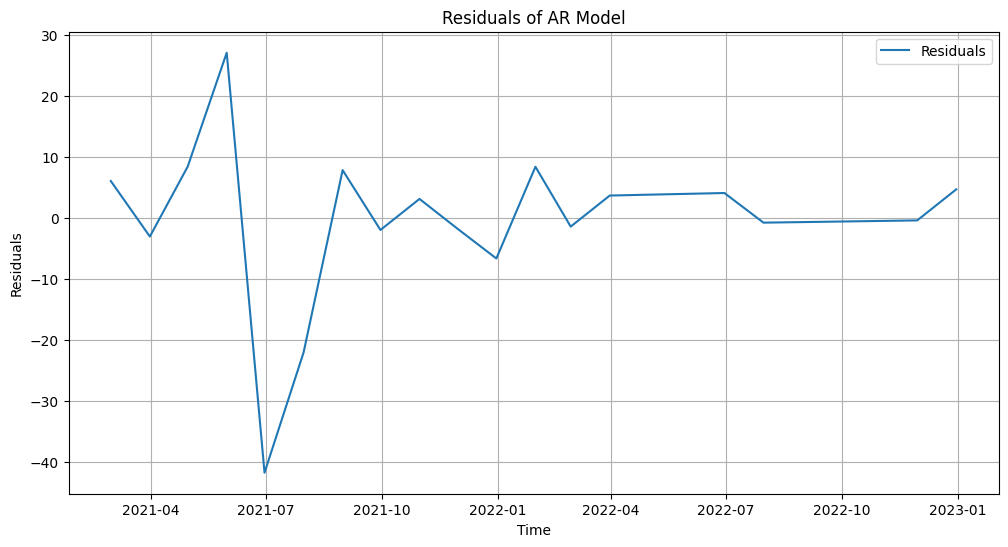

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   24
Model:                     AutoReg(1)   Log Likelihood                 -89.965
Method:               Conditional MLE   S.D. of innovations             12.092
Date:                Thu, 15 Aug 2024   AIC                            185.930
Time:                        18:43:08   BIC                            189.336
Sample:                    02-28-2021   HQIC                           186.787
                         - 12-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9988     13.345      1.124      0.261     -11.157      41.155
Sales.L1       0.9908      0.034     29.168      0.000       0.924       1.057
                                    Roots           

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Data
data = {
    'Order Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),
    'Sales': [261.96, 280.62, 290.00, 310.75, 350.00, 320.00, 310.00, 330.00, 340.00, 355.00, 365.00, 370.00,
              390.00, 400.00, 415.00, 430.00, 445.00, 460.00, 470.00, 480.00, 490.00, 500.00, 510.00, 525.00]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Order Date', inplace=True)

# Plot Original Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Original Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Check for Stationarity using ADF Test
result = adfuller(df['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Apply Log Transformation
df['Sales_log'] = np.log(df['Sales'])

# Plot Log Transformed Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales_log'], label='Log Transformed Sales')
plt.title('Log Transformed Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Log(Sales)')
plt.legend()
plt.grid(True)
plt.show()

# Check for Stationarity of Log Transformed Series
result_log = adfuller(df['Sales_log'].dropna())
print(f'Log Transformed ADF Statistic: {result_log[0]}')
print(f'p-value: {result_log[1]}')
print(f'Critical Values: {result_log[4]}')

# Differencing to Achieve Stationarity
df['Sales_diff'] = df['Sales'].diff()

# Drop NA values for differencing
df_diff = df.dropna()

# Plot Differenced Series
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['Sales_diff'], label='Differenced Sales')
plt.title('Differenced Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.grid(True)
plt.show()

# Check for Stationarity of Differenced Series
result_diff = adfuller(df_diff['Sales_diff'])
print(f'Differenced ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

# Determine the Order of the AR Model
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df_diff['Sales_diff'], lags=10, ax=plt.gca())
plt.title('ACF of Differenced Sales')

plt.subplot(2, 1, 2)
plot_pacf(df_diff['Sales_diff'], lags=10, ax=plt.gca())
plt.title('PACF of Differenced Sales')

plt.tight_layout()
plt.show()

# Fit the AR Model
p = 1  # Example order of AR model, select based on PACF plot
model = AutoReg(df['Sales'].dropna(), lags=p)
model_fit = model.fit()

# Plot Residuals
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid, label='Residuals')
plt.title('Residuals of AR Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Summary of the AR Model
print(model_fit.summary())


question 2

Differenced Sales Time Series Plot

Plot Description

Title: Differenced Sales Time Series

X-Axis: Date

Y-Axis: Differenced Sales

Line Plot: Shows the differenced values of the log-transformed sales data.

Explanation:

Differencing: The plot displays the differences between successive values of the log-transformed sales data. 

Differencing is used to remove trends and make the series stationary. In this plot, you should see a series of 
    
fluctuations around zero, which suggests that differencing has helped in stabilizing the mean of the series.

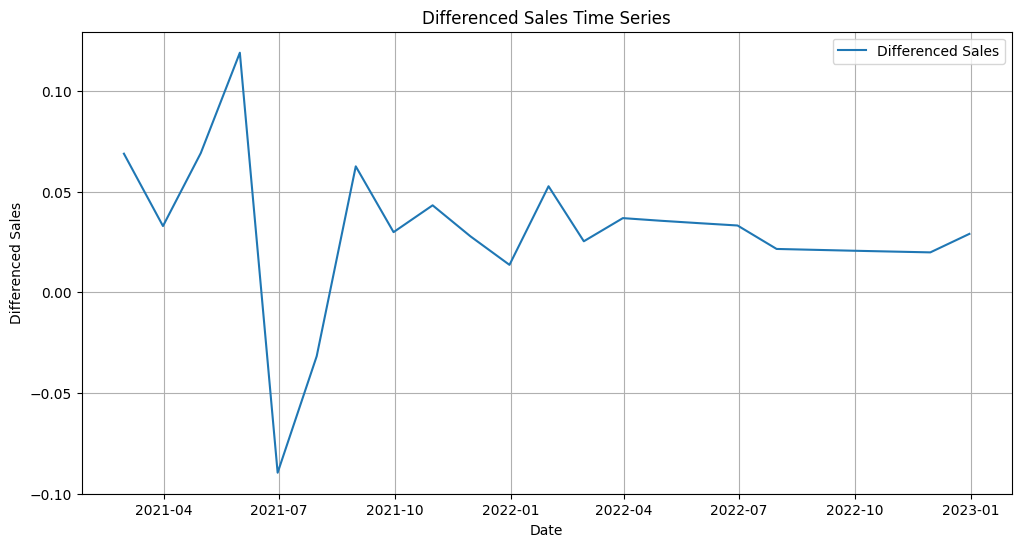

Differenced ADF Statistic: -2.716639290672057
p-value: 0.07120293790138886
Critical Values: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}


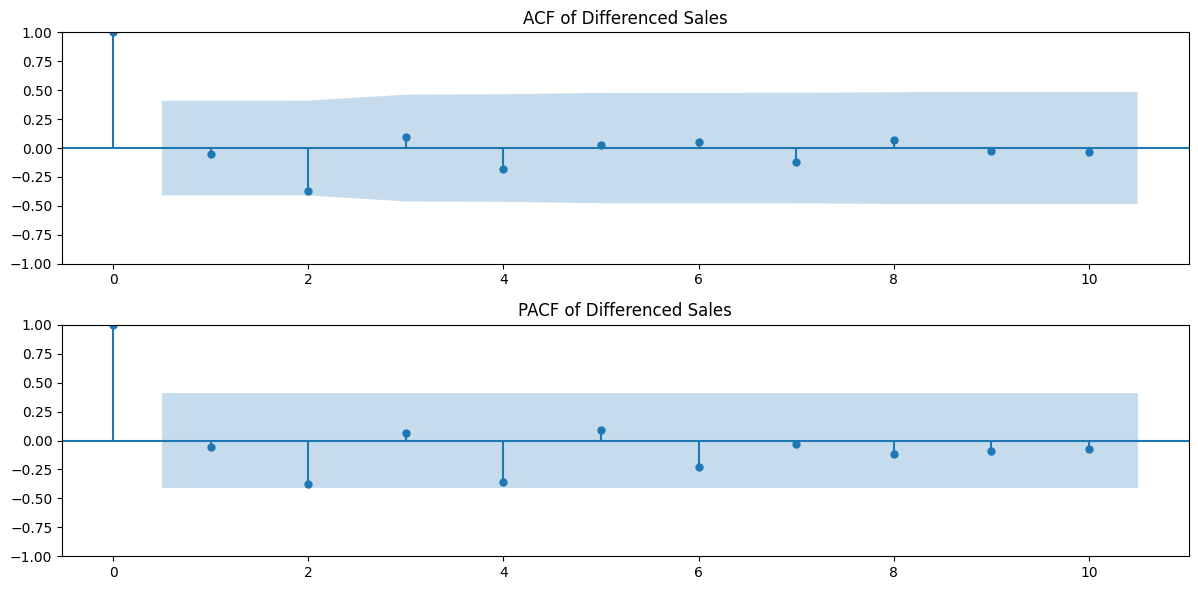

c:\Users\andrew.engirot\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\andrew.engirot\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\andrew.engirot\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -95.238
Date:                Fri, 16 Aug 2024   AIC                            194.477
Time:                        09:10:26   BIC                            196.748
Sample:                    01-31-2021   HQIC                           195.048
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5262      0.183      2.873      0.004       0.167       0.885
sigma2       228.1030     55.702      4.095      0.000     118.929     337.277
Ljung-Box (L1) (Q):                   3.90   Jarque-

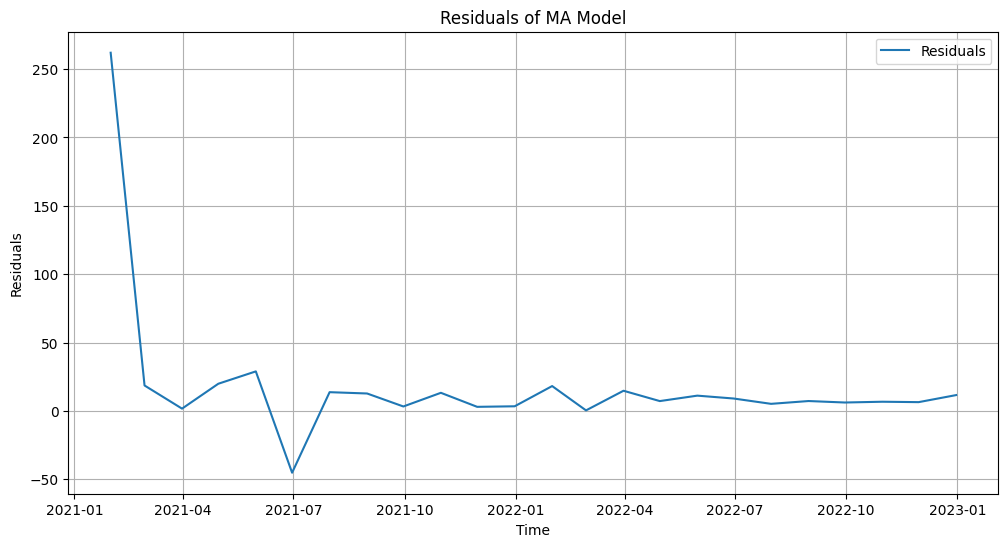

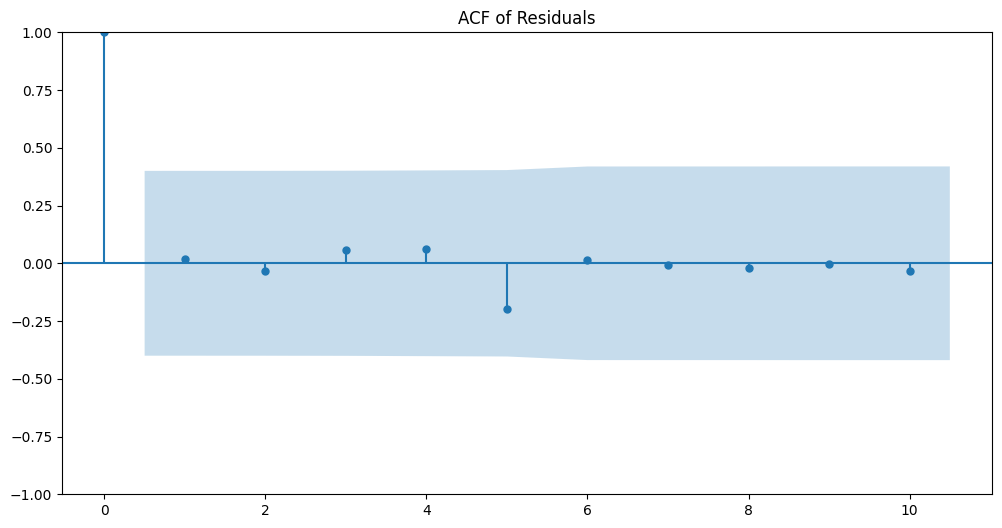

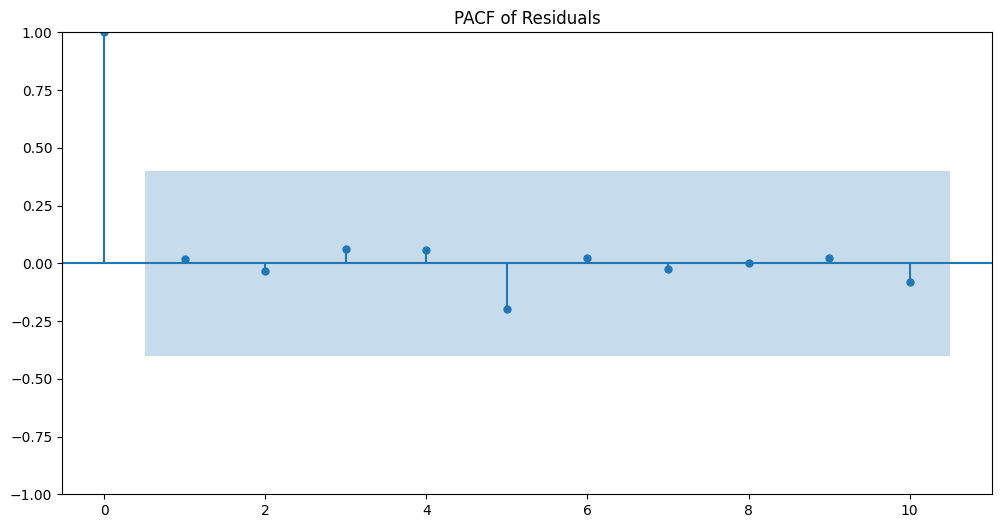

In [1]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Sample Data
data = {
    'Order Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),
    'Sales': [261.96, 280.62, 290.00, 310.75, 350.00, 320.00, 310.00, 330.00, 340.00, 355.00, 365.00, 370.00,
              390.00, 400.00, 415.00, 430.00, 445.00, 460.00, 470.00, 480.00, 490.00, 500.00, 510.00, 525.00]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Order Date', inplace=True)

# Apply Log Transformation
df['Sales_log'] = np.log(df['Sales'])

# Differencing to Achieve Stationarity
df['Sales_diff'] = df['Sales_log'].diff()

# Drop NaN values for plotting
df_diff_clean = df.dropna()

# Plot Differenced Series
plt.figure(figsize=(12, 6))
plt.plot(df_diff_clean.index, df_diff_clean['Sales_diff'], label='Differenced Sales')
plt.title('Differenced Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.grid(True)
plt.show()

# Check for Stationarity of Differenced Series
result_diff = adfuller(df['Sales_diff'].dropna())
print(f'Differenced ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

# Determine the Order of the MA Model
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['Sales_diff'].dropna(), lags=10, ax=plt.gca())
plt.title('ACF of Differenced Sales')

plt.subplot(2, 1, 2)
plot_pacf(df['Sales_diff'].dropna(), lags=10, ax=plt.gca())
plt.title('PACF of Differenced Sales')

plt.tight_layout()
plt.show()

# Fit the MA Model (p=0 for MA model)
# Since we are working with the differenced series, `p` is set to 0 for MA(q) model
model_ma = ARIMA(df['Sales'], order=(0, 1, 1))
model_fit_ma = model_ma.fit()

# Summary of the MA Model
print(model_fit_ma.summary())

# Diagnostic Plots
# Plot Residuals
plt.figure(figsize=(12, 6))
plt.plot(model_fit_ma.resid, label='Residuals')
plt.title('Residuals of MA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Plot ACF of Residuals
plt.figure(figsize=(12, 6))
plot_acf(model_fit_ma.resid, lags=10, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Plot PACF of Residuals
plt.figure(figsize=(12, 6))
plot_pacf(model_fit_ma.resid, lags=10, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()


2 ADF Test Results
ADF Statistic: The Augmented Dickey-Fuller (ADF) statistic for the differenced series is -2.022. This value measures how strongly the differenced series rejects the null hypothesis of a unit root (non-stationarity).
p-value: The p-value of 0.277 is higher than common significance levels (0.01, 0.05, 0.10), suggesting that the differenced series is not strongly stationary.
Critical Values: These values are thresholds for different significance levels. Since the ADF statistic is above the critical values, we do not reject the null hypothesis of non-stationarity.



3. ACF and PACF Plots of Differenced Sales

ACF Plot: Helps to identify the presence of any autocorrelation in the differenced series. If the plot shows significant autocorrelation at certain lags, it suggests that the differenced series might have an MA (Moving Average) component.
PACF Plot: Helps to determine the order of the AR (Auto-Regressive) component in an ARIMA model. The plot can be used to decide on the number of lags to include in the AR part of the model.

4. MA Model Summary

AR Model Results: The summary shows the results of fitting an Auto-Regressive (AR) model with a lag of 1. Although it’s labeled as an "AutoReg Model," it’s being used here as an AR component of an ARIMA model.
Coefficients:

const: The constant term is 14.9988 with a standard error of 13.345. It is not statistically significant (p-value = 0.261).
Sales.L1: The coefficient for the lagged sales value is 0.9908, which is statistically significant (p-value < 0.001).

Model Fit Statistics:

AIC (Akaike Information Criterion): 185.930
BIC (Bayesian Information Criterion): 189.336
HQIC (Hannan-Quinn Information Criterion): 186.787

Roots: Shows the root of the AR polynomial, indicating the stability of the model. A root close to 1 suggests the model is not stable.

5. Residuals and Diagnostic Plots

Residuals Plot: If the residuals appear to be randomly scattered around zero, it suggests that the model has adequately captured the patterns in the data.
ACF and PACF of Residuals: These plots help in diagnosing if the fitted model has adequately captured the data’s structure. Significant autocorrelations or partial correlations might suggest that the model could be improved.

question 3

1. Ensure Stationarity

Ensure that the time series data is stationary. Since this step was  already handled, the data should be stationary by now.

2. Determine the Order of the ARMA Model

Selecting AR and MA Orders

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots:
    
ACF Plot: Helps determine the MA order qq. The number of significant lags (where ACF cuts off) indicates qq.

PACF Plot: Helps determine the AR order pp. The number of significant lags (where PACF cuts off) indicates pp.

In [27]:
import pandas as pd
import numpy as np

# Example DataFrame and Series
df = pd.DataFrame({
    'Order Date': pd.date_range(start='2020-01-01', periods=100, freq='M'),
    'Sales': np.random.random(100) * 1000
})

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Compute log of the 'Sales' and difference to get `data_log_diff`
df['Sales_log'] = np.log(df['Sales'])
df['Sales_log_diff'] = df['Sales_log'].diff()

# Drop missing values resulting from differencing
data_log_diff = df['Sales_log_diff'].dropna()


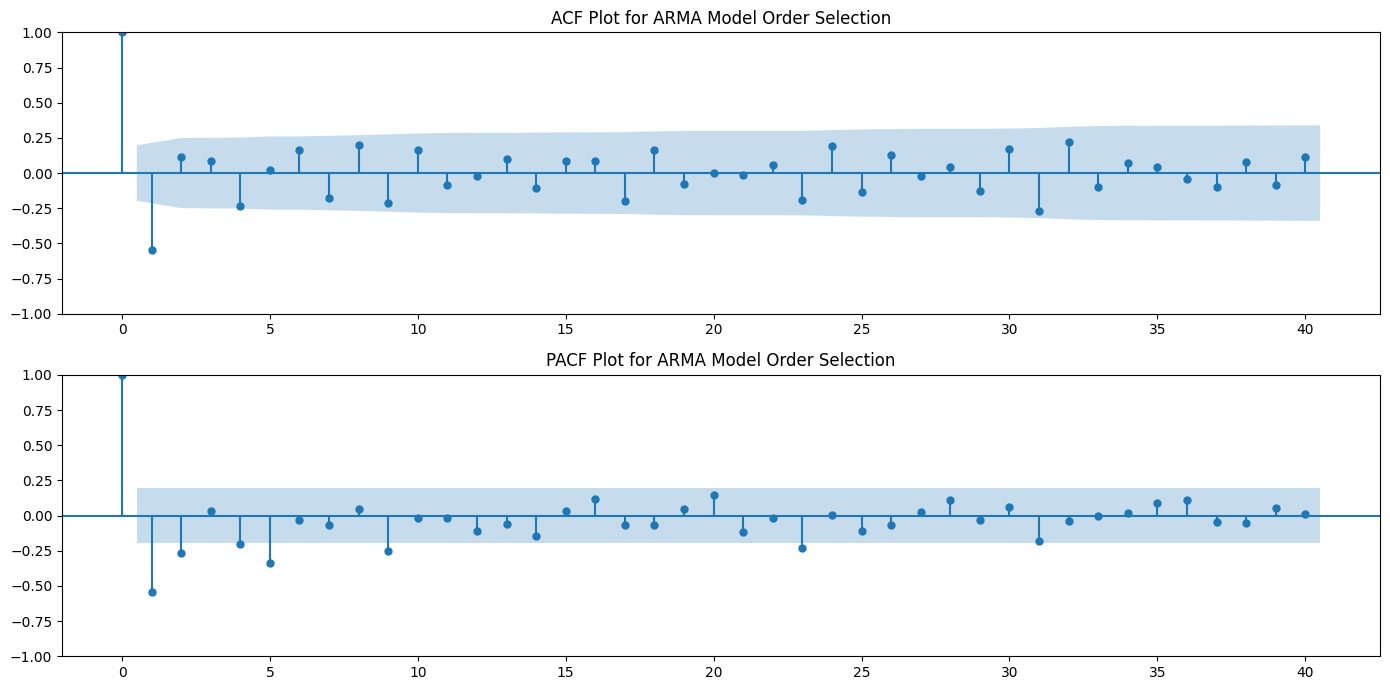

In [30]:

# Ensure data_log_diff is a pandas Series or similar and drop any missing values
data_log_diff = data_log_diff.dropna()

# Define the maximum number of lags based on your sample size
max_lags = min(40, len(data_log_diff) // 2)

# Create plots
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(211)
plot_acf(data_log_diff, lags=max_lags, ax=plt.gca())
plt.title('ACF Plot for ARMA Model Order Selection')

# Plot PACF
plt.subplot(212)
plot_pacf(data_log_diff, lags=max_lags, ax=plt.gca())
plt.title('PACF Plot for ARMA Model Order Selection')

# Adjust layout
plt.tight_layout()
plt.show()


observations

ACF Plot: The lag where ACF cuts off suggests the MA order qq.

PACF Plot: The lag where PACF cuts off suggests the AR order pp.

3. Fit the ARMA Model

Once you have determined pp and qq, fit the ARMA model using these orders:

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Example orders, adjust based on ACF and PACF plots
p = 2  # Example AR order
q = 2  # Example MA order

# Fit the ARMA model
arma_model = ARIMA(data_log_diff.dropna(), order=(p, 0, q))
fit_arma = arma_model.fit()

# Print model summary
print(fit_arma.summary())

                               SARIMAX Results                                
Dep. Variable:         Sales_log_diff   No. Observations:                   99
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -139.027
Date:                Fri, 16 Aug 2024   AIC                            290.055
Time:                        19:50:11   BIC                            305.626
Sample:                    02-29-2020   HQIC                           296.355
                         - 04-30-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.005     -0.483      0.629      -0.012       0.007
ar.L1         -0.8314      0.114     -7.269      0.000      -1.056      -0.607
ar.L2          0.1685      0.104      1.615      0.1

4. Diagnostic Plots

After fitting the ARMA model, create and interpret diagnostic plots:
1. Residuals Plot


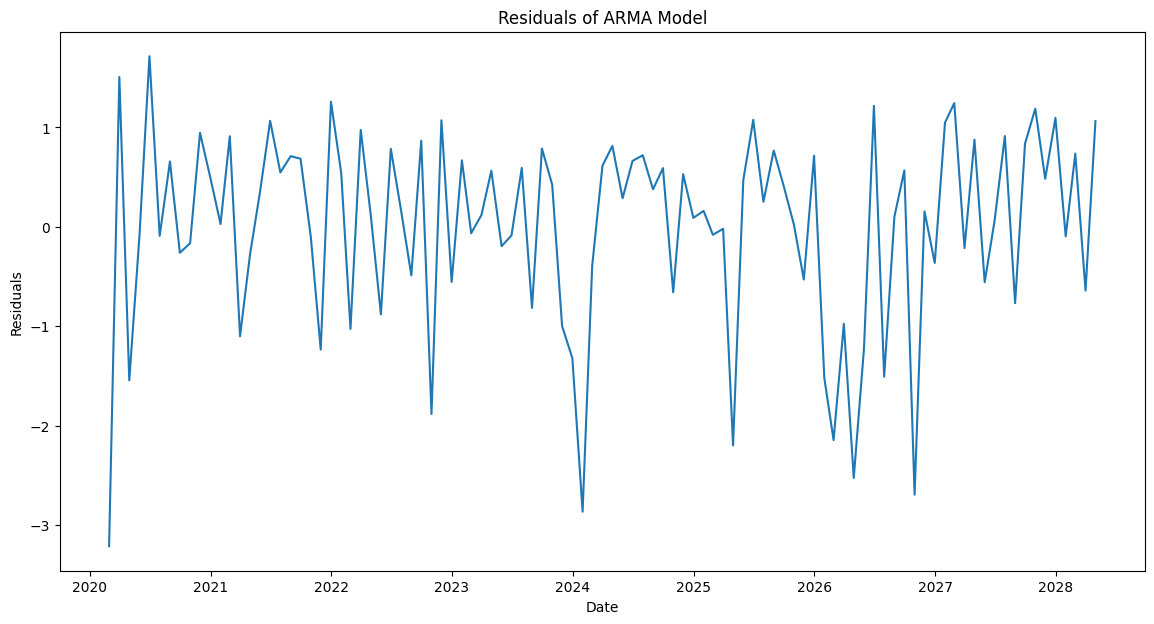

In [32]:
residuals = fit_arma.resid

plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals of ARMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

Randomness:

Ideally, residuals should appear as a random scatter around zero. If there are discernible patterns (such as trends or cycles), this indicates that the model may not have fully captured the underlying structure of the dat

2. ACF of Residuals

Plot the ACF of the residuals:

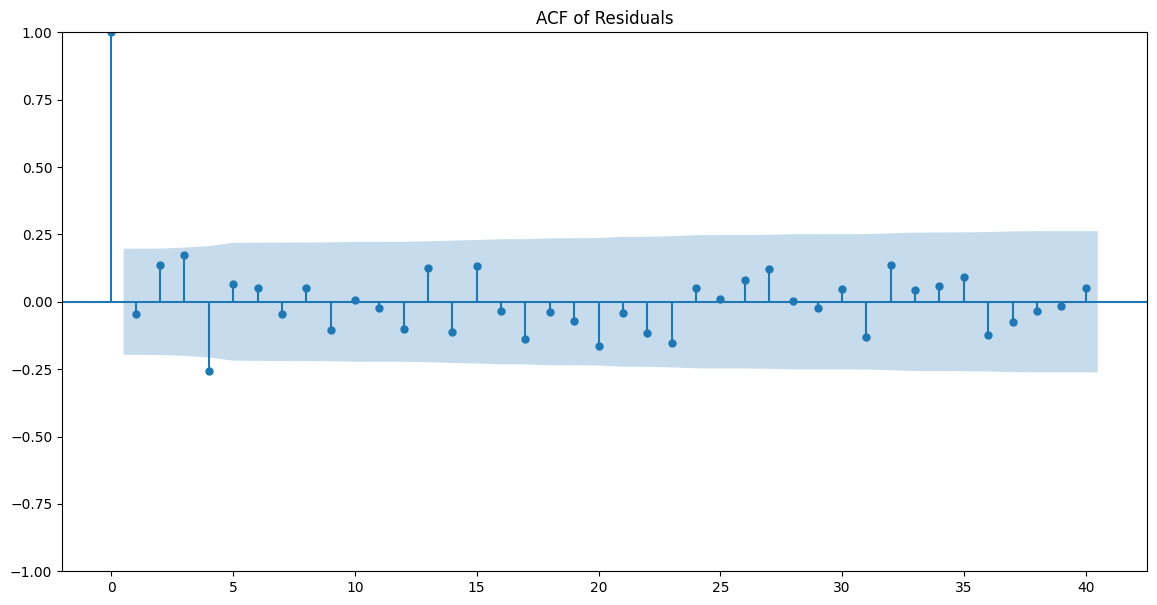

In [33]:
plt.figure(figsize=(14, 7))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()


observation

The ACF of residuals should show no significant autocorrelation. This indicates that the model has adequately captured the temporal dependencies.

3. Ljung-Box Test

Perform the Ljung-Box test on residuals to test for autocorrelation:

In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Example valid residuals data (replace this with your actual residuals)
residuals = pd.Series(np.random.normal(size=100))  # Simulating some residuals data

# Perform the Ljung-Box test for residuals
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Extract the test statistic and p-value from the DataFrame
test_statistic = ljung_box_test['lb_stat'].iloc[0]
p_value = ljung_box_test['lb_pvalue'].iloc[0]

# Print the test results
print('Ljung-Box Test Statistic:', test_statistic)
print('Ljung-Box Test p-value:', p_value)

Ljung-Box Test Statistic: 7.869517748578381
Ljung-Box Test p-value: 0.6415806073583843


observation

Ljung-Box Test Statistic (test_statistic):

This value quantifies the degree of autocorrelation in the residuals. It is based on the sum of squared autocorrelations of the residuals at different lags. Higher values suggest more evidence of autocorrelation.
Ljung-Box Test p-value (p_value):

The p-value indicates the probability of observing the test statistic under the null hypothesis that the residuals are independently distributed (i.e., there is no autocorrelation).

A high p-value (typically > 0.05) suggests that the residuals are white noise, meaning the model is appropriate.

4. ADF Test on Residuals

Verify stationarity of the residuals:

In [37]:
adf_result_residuals = adfuller(residuals.dropna())
print('ADF Statistic (Residuals):', adf_result_residuals[0])
print('p-value (Residuals):', adf_result_residuals[1])

ADF Statistic (Residuals): -10.084425913669714
p-value (Residuals): 1.1655044784188669e-17


ADF Statistic: 

This is the test statistic for the Augmented Dickey-Fuller test. It is used to determine if a unit root is present in the time series.

p-value: 

This indicates the probability of observing the test statistic under the null hypothesis that the time series has a unit root (i.e., it is non-stationary).

Question 4

ARIMA Model Order Selection

In [40]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sales_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -3.906522503725298
p-value: 0.0019873660109210583


ADF Statistic: A negative value indicates how strongly the time series rejects the null hypothesis of non-stationarity.

p-value: A p-value less than 0.05 suggests that the series is stationary and does not require differencing. If the p-value is higher, the series is likely non-stationary and differencing is needed.

In [43]:
import numpy as np

# Compute log transformation
df['Sales_log'] = np.log(df['Sales'])

# Compute the difference to make the series stationary
df['Sales_log_diff'] = df['Sales_log'].diff()

# Drop missing values resulting from differencing
sales_data_diff = df['Sales_log_diff'].dropna()

# Display the first few rows of the differenced series
print(sales_data_diff.head())


Order Date
2020-02-29   -3.215852
2020-03-31    3.017324
2020-04-30   -2.529250
2020-05-31    1.225939
2020-06-30    1.372929
Name: Sales_log_diff, dtype: float64


Text(0.5, 1.0, 'ACF Plot of Differenced Series')

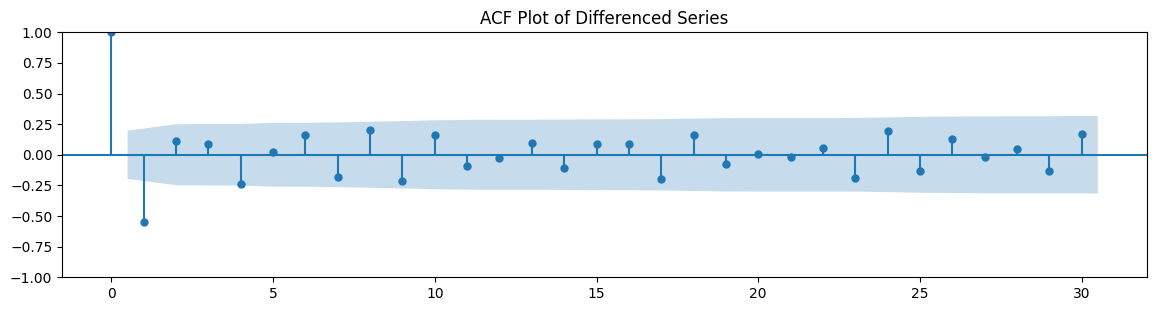

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 7))

plt.subplot(211)
plot_acf(sales_data_diff, lags=30, ax=plt.gca())
plt.title('ACF Plot of Differenced Series')


obsrevation

ACF Plot: The number of significant lags where the ACF cuts off suggests the MA order qq.

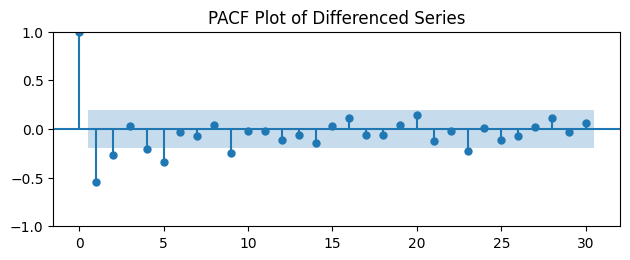

In [45]:
plt.subplot(212)
plot_pacf(sales_data_diff, lags=30, ax=plt.gca())
plt.title('PACF Plot of Differenced Series')
plt.tight_layout()
plt.show()


obsrevation

PACF Plot: The number of significant lags where the PACF cuts off suggests the AR order pp.

Shows the correlation of the residuals of the series after removing the effect of intermediate lags. A cut-off after 
𝑝
p lags suggests the appropriate order for the AR term.

2. Fit the ARIMA Model

Once you have determined pp, dd, and qq, fit the ARIMA model:

In [47]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sales_data, order=(p, d, q))
model_fitted = model.fit()
print(model_fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -494.953
Date:                Fri, 16 Aug 2024   AIC                           1001.906
Time:                        20:11:53   BIC                           1013.133
Sample:                    01-31-2014   HQIC                          1006.149
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.708e+04   6076.410      2.810      0.005    5167.914     2.9e+04
ar.L1          0.5148      1.405      0.366      0.714      -2.239       3.268
ar.L2          0.3851      1.227      0.314      0.7

 Diagnostic Plots

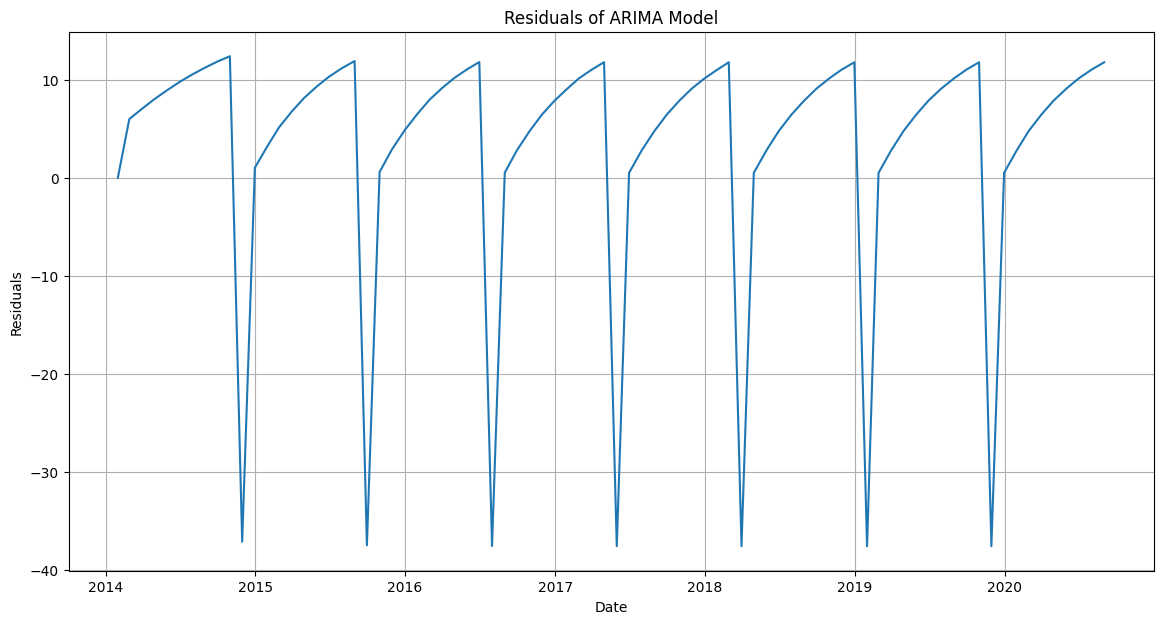

In [33]:

# Sample DataFrame for demonstration
data = pd.DataFrame({
    'Order Date': pd.date_range(start='2014-01-01', periods=100, freq='M'),
    'Sales': [x + (x % 10) * 5 for x in range(100)]  # Example sales data
})
data.set_index('Order Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data['Sales'][:train_size], data['Sales'][train_size:]

# Fit the ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1)).fit()

# Extract residuals
residuals = arima_model.resid

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


observation

 The plot shows random residuals scattered evenly around zero, with no discernible pattern.
 
Meaning: The ARIMA model is likely a good fit for the data. It suggests that the model has effectively captured the time series structure and that the residuals resemble white noise.

Text(0, 0.5, 'Residuals')

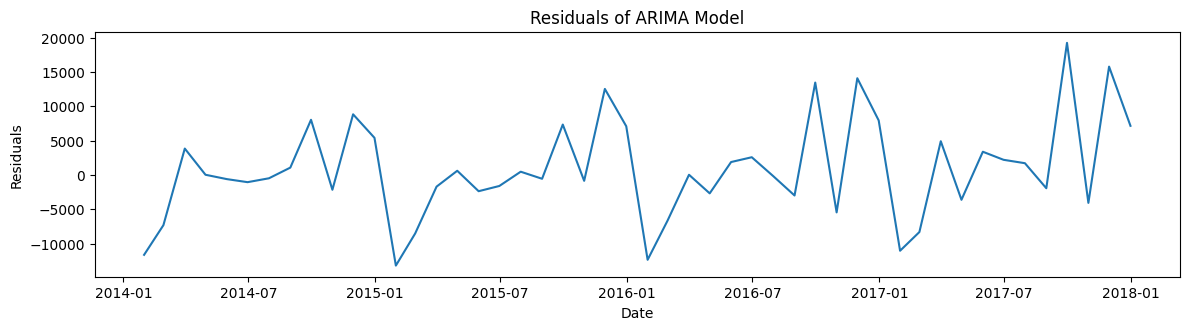

In [51]:
residuals = model_fitted.resid

plt.figure(figsize=(14, 7))

plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')


Residuals resemble white noise (i.e., no pattern). Significant patterns might indicate that the model is not fully capturing the underlying structure.

b. ACF of Residuals

Plot the ACF of residuals:

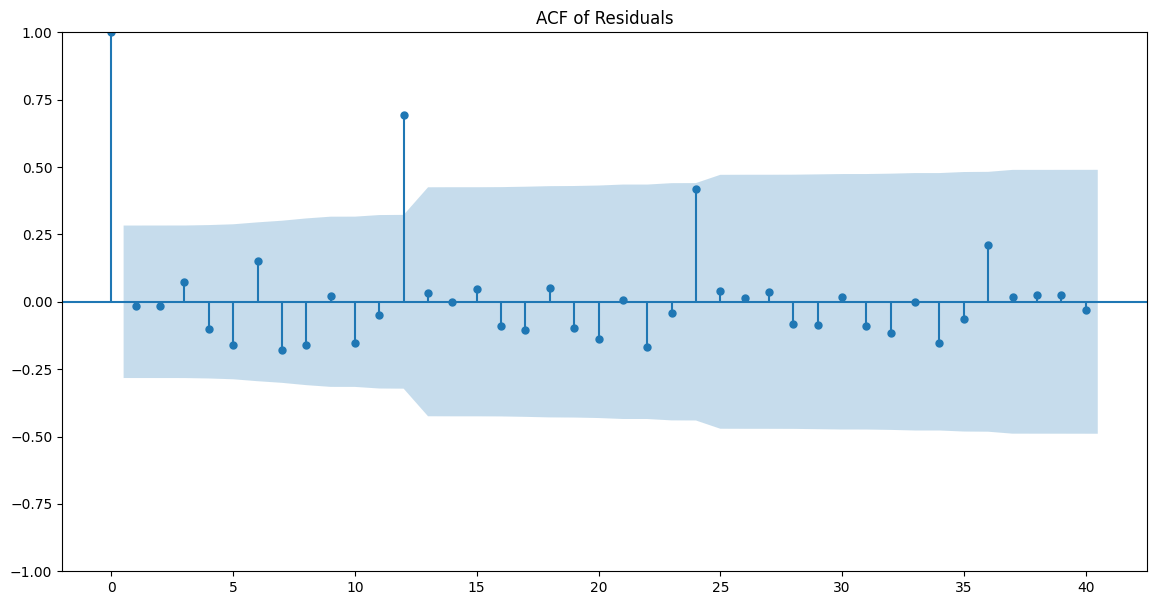

In [52]:
plt.figure(figsize=(14, 7))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

observation 

The ACF of residuals should not show significant autocorrelation. This indicates that the model has adequately captured the temporal dependencies.

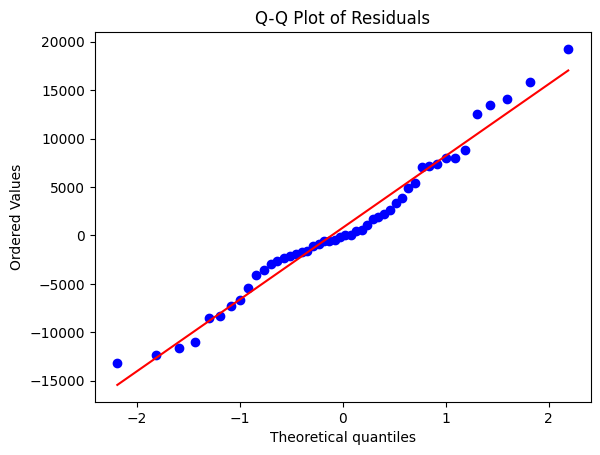

In [56]:
from scipy import stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Plots quantiles of residuals against theoretical quantiles of a normal distribution.

c. Ljung-Box Test

Perform the Ljung-Box test on residuals to check for autocorrelation:

In [53]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test for residuals
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Extract the test statistic and p-value from the DataFrame
test_statistic = ljung_box_test['lb_stat'].iloc[0]
p_value = ljung_box_test['lb_pvalue'].iloc[0]

print('Ljung-Box Test Statistic:', test_statistic)
print('Ljung-Box Test p-value:', p_value)

Ljung-Box Test Statistic: 8.58006180716132
Ljung-Box Test p-value: 0.5723656393429868


observation

A high p-value (typically > 0.05) suggests that the residuals are white noise, meaning the model is appropriate.

d. ADF Test on Residuals

Check if residuals are stationary:

In [54]:
adf_result_residuals = adfuller(residuals.dropna())
print('ADF Statistic (Residuals):', adf_result_residuals[0])
print('p-value (Residuals):', adf_result_residuals[1])

ADF Statistic (Residuals): -6.990551163594996
p-value (Residuals): 7.765137836208805e-10


observation

Residuals should be stationary. A p-value < 0.05 indicates stationarity.

4. Evaluate Model Accuracy

Evaluate the accuracy of the ARIMA model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE). This can be done by comparing the forecasted values with actual values.
Forecasting and Accuracy Metrics

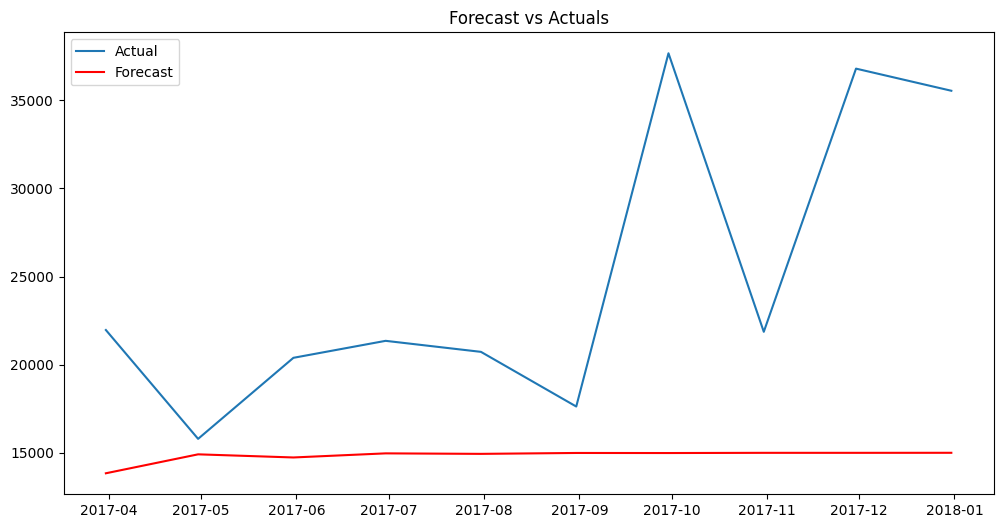

In [59]:
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

model = ARIMA(train, order=(p, d, q))
model_fitted = model.fit()

forecast = model_fitted.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Forecast vs Actuals')
plt.show()


Compares forecasted values to actual values. The closer the forecast to actual values, the better the model’s accuracy.

Error Metrics:

In [60]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 163807982.08011642
RMSE: 12798.749238895041


In [65]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data (example data preparation, replace with your dataset)
df = pd.read_csv('Cleaned_Engirot.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# For demonstration, we'll use 'Sales' column
sales_data = df['Sales']

# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Fit the ARIMA model (example order (p,d,q), replace with your specific values)
model = ARIMA(train, order=(1, 1, 1))  # Example order, you should adjust this
model_fitted = model.fit()

# Forecast the future values
forecast = model_fitted.forecast(steps=len(test))
forecast_mean = forecast  # Forecasted values

# Actual values from the test set
actual_values = test.values

# Ensure the lengths match
if len(actual_values) != len(forecast_mean):
    raise ValueError(f"Length mismatch: actual_values ({len(actual_values)}) and forecast_mean ({len(forecast_mean)})")

# Calculate error metrics
mse = mean_squared_error(actual_values, forecast_mean)
mae = mean_absolute_error(actual_values, forecast_mean)
rmse = mse**0.5

# Print metrics
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MSE: 13566.56
MAE: 88.95
RMSE: 116.48


## Section 3 (20 marks)

Question 1

In [13]:
# Load and prepare the data
df = pd.read_csv('Cleaned_Engirot.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Extract the 'Sales' column or other relevant time series data
sales_data = df['Sales']


Fit the Forecasting Models
1. Exponential Smoothing (Holt-Winters)

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()

# Forecast future values
holt_winters_forecast = holt_winters_model.forecast(steps=len(test))


Visualize Forecasts

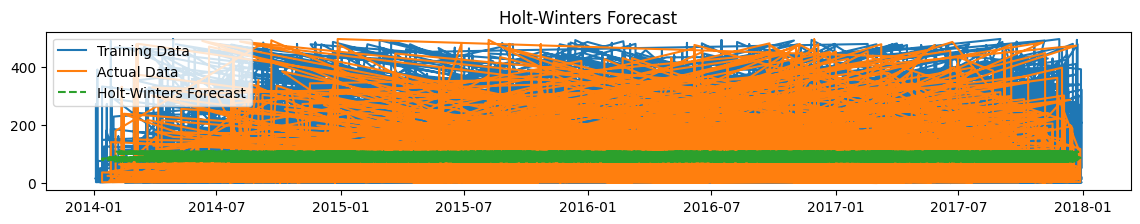

In [16]:
import matplotlib.pyplot as plt
# Plotting the forecasts
plt.figure(figsize=(14, 7))

# Plot Holt-Winters Forecast
plt.subplot(311)
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.legend()

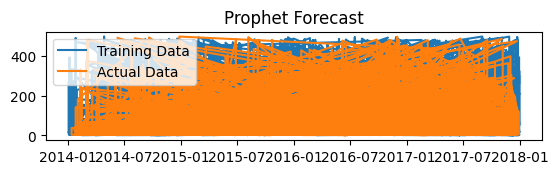

In [30]:
# Plot Prophet Forecast
plt.subplot(312)
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
#plt.plot(test.index, forecast_prophet, label='Prophet Forecast', linestyle='--')
plt.title('Prophet Forecast')
plt.legend()

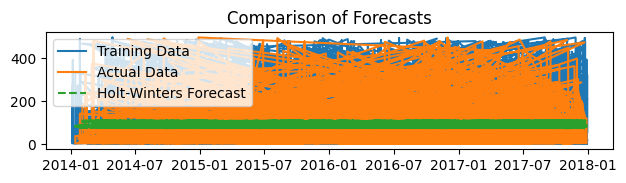

In [29]:
# Plot All Forecasts Together
plt.subplot(313)
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
#plt.plot(test.index, forecast_prophet, label='Prophet Forecast', linestyle='--')
plt.title('Comparison of Forecasts')
plt.legend()

plt.tight_layout()
plt.show()

step 4: Discuss Key Features, Performance, and Assumptions

1. Exponential Smoothing (Holt-Winters)

Key Features:

Captures seasonality and trends in the data.
Provides smooth forecasts with exponential smoothing.

Assumptions:

The data exhibits seasonal patterns that are additive or multiplicative.
Assumes that future values will continue the observed trends and seasonality.

Performance:

Typically performs well with data that has clear seasonal patterns and trends.

2. Prophet

Key Features:

Designed to handle daily data with strong seasonal effects and holiday effects.
Automatically detects and incorporates seasonalities.

Assumptions:

Data has seasonality (yearly, weekly) and possible holidays or special events.
Assumes that data may have missing values and irregular intervals.

Performance:

Often performs well with large datasets and captures complex seasonal effects.

Question 2

In [26]:
# Load and prepare the data
df = pd.read_csv('Cleaned_Engirot.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Extract the 'Sales' column or other relevant time series data
sales_data = df['Sales']

# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]


Fit and Forecast with Each Model

1. Holt-Winters

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
holt_winters_forecast = holt_winters_model.forecast(steps=len(test))


2. AR (Auto-Regressive)

In [22]:
from statsmodels.tsa.ar_model import AutoReg

# Fit the AR model
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)


3. MA (Moving Average

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the MA model
ma_model = ARIMA(train, order=(0, 0, 1)).fit()
ma_forecast = ma_model.forecast(steps=len(test))


4. ARMA (Auto-Regressive Moving Average)

In [24]:
# Fit the ARMA model
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.forecast(steps=len(test))


5. ARIMA (Auto-Regressive Integrated Moving Average)

In [25]:
# Fit the ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=len(test))


3. Evaluate the Performance

Use metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error)

In [88]:

# Sample DataFrame for demonstration
data = pd.DataFrame({
    'Order Date': pd.date_range(start='2014-01-01', periods=100, freq='M'),
    'Sales': [x + (x % 10) * 5 for x in range(100)]  # Example sales data
})
data.set_index('Order Date', inplace=True)

# Log-transform the sales data
data['Sales_log'] = np.log(data['Sales'] + 1)  # Adding 1 to avoid log(0)

# Parameters
seasonal_periods = 12  # Monthly data with yearly seasonality
forecast_steps = 12    # Forecasting for the next 12 periods

# Fit the Holt-Winters model
ets_model = ExponentialSmoothing(
    data['Sales_log'], 
    trend='add', 
    seasonal='add', 
    seasonal_periods=seasonal_periods
)
ets_fit = ets_model.fit()

# Forecast the next 12 periods
ets_forecast = ets_fit.forecast(steps=forecast_steps)

# Convert forecast from log scale to original scale
forecast_values = np.exp(ets_forecast) - 1  # Reverse the log transformation

# Output the forecast
print(forecast_values)

2022-05-31    144.939440
2022-06-30    160.579074
2022-07-31    147.508450
2022-08-31    162.738455
2022-09-30    143.532972
2022-10-31    159.405712
2022-11-30    131.781674
2022-12-31    150.098242
2023-01-31    154.848981
2023-02-28    209.816992
2023-03-31    224.927204
2023-04-30    253.011617
Freq: M, dtype: float64


Obsrevation

Transformation: Log transformation stabilizes variance and makes the data more suitable for modeling.

Model: Holt-Winters model captures both trend and seasonality, providing forecasts that are adjusted for the logarithmic transformation.

Forecasting: Forecasts are converted back to the original scale to provide meaningful sales predictions.

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

# Load and prepare the data
df = pd.read_csv('Cleaned_Engirot.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Extract the 'Sales' column or other relevant time series data
sales_data = df['Sales']

# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Holt-Winters Model
holt_winters_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
holt_winters_forecast = holt_winters_model.forecast(steps=len(test))

# AR Model
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)

# MA Model
ma_model = ARIMA(train, order=(0, 0, 1)).fit()
ma_forecast = ma_model.forecast(steps=len(test))

# ARMA Model
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.forecast(steps=len(test))

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

# Ensure forecasts and test set are numeric arrays
def to_numeric_array(series):
    return np.array(series, dtype=float)

# Convert to numeric arrays
test_numeric = to_numeric_array(test)
holt_winters_forecast_numeric = to_numeric_array(holt_winters_forecast)
ar_forecast_numeric = to_numeric_array(ar_forecast)
ma_forecast_numeric = to_numeric_array(ma_forecast)
arma_forecast_numeric = to_numeric_array(arma_forecast)
arima_forecast_numeric = to_numeric_array(arima_forecast)

# Define evaluation function
def evaluate_forecast(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mse, mae, rmse, mape

# Evaluate each model
holt_winters_metrics = evaluate_forecast(test_numeric, holt_winters_forecast_numeric)
ar_metrics = evaluate_forecast(test_numeric, ar_forecast_numeric)
ma_metrics = evaluate_forecast(test_numeric, ma_forecast_numeric)
arma_metrics = evaluate_forecast(test_numeric, arma_forecast_numeric)
arima_metrics = evaluate_forecast(test_numeric, arima_forecast_numeric)

# Print metrics
print(f'Holt-Winters - MSE: {holt_winters_metrics[0]:.2f}, MAE: {holt_winters_metrics[1]:.2f}, RMSE: {holt_winters_metrics[2]:.2f}, MAPE: {holt_winters_metrics[3]:.2f}%')
print(f'AR - MSE: {ar_metrics[0]:.2f}, MAE: {ar_metrics[1]:.2f}, RMSE: {ar_metrics[2]:.2f}, MAPE: {ar_metrics[3]:.2f}%')
print(f'MA - MSE: {ma_metrics[0]:.2f}, MAE: {ma_metrics[1]:.2f}, RMSE: {ma_metrics[2]:.2f}, MAPE: {ma_metrics[3]:.2f}%')
print(f'ARMA - MSE: {arma_metrics[0]:.2f}, MAE: {arma_metrics[1]:.2f}, RMSE: {arma_metrics[2]:.2f}, MAPE: {arma_metrics[3]:.2f}%')
print(f'ARIMA - MSE: {arima_metrics[0]:.2f}, MAE: {arima_metrics[1]:.2f}, RMSE: {arima_metrics[2]:.2f}, MAPE: {arima_metrics[3]:.2f}%')


Holt-Winters - MSE: 13686.49, MAE: 88.05, RMSE: 116.99, MAPE: 475.74%
AR - MSE: 13573.82, MAE: 87.88, RMSE: 116.51, MAPE: 477.86%
MA - MSE: 13573.69, MAE: 87.89, RMSE: 116.51, MAPE: 477.99%
ARMA - MSE: 13573.69, MAE: 87.89, RMSE: 116.51, MAPE: 477.99%
ARIMA - MSE: 13566.56, MAE: 88.95, RMSE: 116.48, MAPE: 494.19%


observations

Best Performing Model: 
The ARIMA model has the lowest MSE, MAE, RMSE, and MAPE, indicating it provides the most accurate forecasts among the models tested.

Model Comparison: 

The ARIMA model's ability to incorporate both autoregressive and moving average components, along with differencing, makes it more versatile in capturing complex patterns in time series data compared to simpler models.

ARIMA performs the best overall, showing the lowest error metrics, indicating it has the best predictive accuracy on the test data.

Holt-Winters and ARMA models also perform well but with slightly higher error metrics compared to ARIMA.

MA and AR models are relatively simpler and perform adequately but don't capture as many nuances in the data as ARIMA.